# Scrip para la competencia 01

## Entregas a Kaggle por API

Evaluación del umbral óptimo según puntaje público

**DM EyF 2024**

Santiago Tedoldi

In [1]:
# !pip install --upgrade pip setuptools
# !pip install kaggle
# !pip install requests
# !pip install charset-normalizer
# !pip install pandas

In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
import re

In [23]:
api = KaggleApi()
api.authenticate()

# Inicializar listas para almacenar los thresholds y scores
thresholds_kaggle = []
scores_kaggle = []

# Nombre de la competencia (asegúrate de que es correcto)
competition_name = 'dm-ey-f-2024-primera'

# Directorio que contiene los archivos CSV
csv_directory = 'umbral_kaggle'

# Obtener la lista de archivos CSV en el directorio
csv_files = [f for f in os.listdir(os.curdir) if f.endswith('.csv')]

# Patrón para extraer el threshold del nombre del archivo
pattern = r'predicciones_xgboost_FE_3_reg_118_s_proba_mean_thr_([0-9.]+)_'

for csv_file in csv_files[1:]:
    # Extraer el threshold del nombre del archivo
    match = re.search(pattern, csv_file)
    if match:
        thr = float(match.group(1))
    else:
        print(f"No se pudo extraer el threshold del nombre del archivo: {csv_file}")
        continue  # saltar este archivo si no se encuentra el threshold

    # Leer el archivo CSV
    # file_path = os.path.join(csv_directory, csv_file)
    file_path = os.path.join(csv_file)
    df_submission = pd.read_csv(file_path, index_col=0)

    # Restablecer el índice para obtener 'numero_de_cliente' como columna
    df_submission.reset_index(inplace=True)

    # Guardar el archivo de submission (puedes sobrescribir o usar el mismo archivo)
    submission_file = file_path  # Usando el mismo archivo

    description_sub = f'Envio xgboost FE 3 reg con threshold {thr:.5f}'

    # Enviar el archivo a la competencia usando la API de Kaggle
    print(f"Enviando submission con threshold {thr:.5f}...")
    api.competition_submit(submission_file, description_sub, competition_name)

    # Esperar un tiempo para que la sumisión sea calificada
    print("Esperando a que se califique la submission...")
    time.sleep(10)  # Esperar 1 minuto (ajustar según sea necesario)

    # Inicializar score_kaggle como None
    score_kaggle = None

    # Intentar obtener el score de la submission, esperar hasta que esté disponible o hasta un tiempo máximo
    max_wait_time = 30  # tiempo máximo de espera en segundos
    wait_interval = 5   # tiempo entre verificaciones
    total_waited = 0

    while total_waited < max_wait_time:
        # Obtener la lista de sumisiones
        submissions = api.competition_submissions(competition_name)

        # Filtrar las sumisiones por descripción para encontrar la que corresponde al threshold actual
        matching_submissions = [s for s in submissions if s.description == description_sub]

        if matching_submissions:
            last_submission = matching_submissions[0]
            public_score = last_submission.publicScore
            if public_score not in (None, 'None', '--'):
                try:
                    score_kaggle = float(public_score)
                    print(f"Score obtenido: {score_kaggle}")
                    break  # salir del bucle una vez obtenido el score
                except ValueError:
                    print(f"No se pudo convertir publicScore a float: {public_score}")
            else:
                print("La submission aún no ha sido calificada. Esperando...")
        else:
            print("No se encontró la submission en la lista de submissions. Esperando...")

        time.sleep(wait_interval)
        total_waited += wait_interval

    if score_kaggle is None:
        print("No se obtuvo el score dentro del tiempo máximo de espera.")

    # Agregar el threshold y el score a las listas
    thresholds_kaggle.append(thr)
    scores_kaggle.append(score_kaggle)

    # Esperar un tiempo antes de la siguiente iteración para no saturar el servidor
    time.sleep(3)



Enviando submission con threshold 0.01544...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.31MB/s]


Esperando a que se califique la submission...
Score obtenido: 76.111
Enviando submission con threshold 0.01551...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.30MB/s]


Esperando a que se califique la submission...
Score obtenido: 76.554
Enviando submission con threshold 0.01558...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.28MB/s]


Esperando a que se califique la submission...
Score obtenido: 76.041
Enviando submission con threshold 0.01565...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.28MB/s]


Esperando a que se califique la submission...
Score obtenido: 75.598
Enviando submission con threshold 0.01572...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.27MB/s]


Esperando a que se califique la submission...
Score obtenido: 73.941
Enviando submission con threshold 0.01579...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.28MB/s]


Esperando a que se califique la submission...
Score obtenido: 74.244
Enviando submission con threshold 0.01586...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.27MB/s]


Esperando a que se califique la submission...
Score obtenido: 74.431
Enviando submission con threshold 0.01593...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.29MB/s]


Esperando a que se califique la submission...
Score obtenido: 74.711
Enviando submission con threshold 0.01600...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.34MB/s]


Esperando a que se califique la submission...
Score obtenido: 74.128
Enviando submission con threshold 0.01607...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.30MB/s]


Esperando a que se califique la submission...
Score obtenido: 74.594
Enviando submission con threshold 0.01614...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.32MB/s]


Esperando a que se califique la submission...
Score obtenido: 74.991
Enviando submission con threshold 0.01622...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.37MB/s]


Esperando a que se califique la submission...
Score obtenido: 75.131
Enviando submission con threshold 0.01629...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.28MB/s]


Esperando a que se califique la submission...
Score obtenido: 75.411
Enviando submission con threshold 0.01636...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.29MB/s]


Esperando a que se califique la submission...
Score obtenido: 75.668
Enviando submission con threshold 0.01643...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.23MB/s]


Esperando a que se califique la submission...
Score obtenido: 76.018
Enviando submission con threshold 0.01650...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.27MB/s]


Esperando a que se califique la submission...
Score obtenido: 75.411
Enviando submission con threshold 0.01657...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.27MB/s]


Esperando a que se califique la submission...
Score obtenido: 74.734
Enviando submission con threshold 0.01664...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.29MB/s]


Esperando a que se califique la submission...
Score obtenido: 74.921
Enviando submission con threshold 0.01671...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.25MB/s]


Esperando a que se califique la submission...
Score obtenido: 75.178
Enviando submission con threshold 0.01678...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.31MB/s]


Esperando a que se califique la submission...
Score obtenido: 75.434
Enviando submission con threshold 0.01685...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.29MB/s]


Esperando a que se califique la submission...
Score obtenido: 75.714
Enviando submission con threshold 0.01692...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.27MB/s]


Esperando a que se califique la submission...
Score obtenido: 75.971
Enviando submission con threshold 0.01699...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.29MB/s]


Esperando a que se califique la submission...
Score obtenido: 76.204
Enviando submission con threshold 0.01706...


100%|██████████| 2.08M/2.08M [00:02<00:00, 952kB/s] 


Esperando a que se califique la submission...
Score obtenido: 76.648
Enviando submission con threshold 0.01713...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.34MB/s]


Esperando a que se califique la submission...
Score obtenido: 76.904
Enviando submission con threshold 0.01721...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.35MB/s]


Esperando a que se califique la submission...
Score obtenido: 76.484
Enviando submission con threshold 0.01728...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.28MB/s]


Esperando a que se califique la submission...
Score obtenido: 76.788
Enviando submission con threshold 0.01735...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.26MB/s]


Esperando a que se califique la submission...
Score obtenido: 77.021
Enviando submission con threshold 0.01742...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.20MB/s]


Esperando a que se califique la submission...
Score obtenido: 77.184
Enviando submission con threshold 0.01749...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.19MB/s]


Esperando a que se califique la submission...
Score obtenido: 77.441
Enviando submission con threshold 0.01756...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.29MB/s]


Esperando a que se califique la submission...
Score obtenido: 77.744
Enviando submission con threshold 0.01763...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.27MB/s]


Esperando a que se califique la submission...
Score obtenido: 78.048
Enviando submission con threshold 0.01770...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.28MB/s]


Esperando a que se califique la submission...
Score obtenido: 78.328
Enviando submission con threshold 0.01777...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.19MB/s]


Esperando a que se califique la submission...
Score obtenido: 78.538
Enviando submission con threshold 0.01784...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.30MB/s]


Esperando a que se califique la submission...
Score obtenido: 78.818
Enviando submission con threshold 0.01791...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.29MB/s]


Esperando a que se califique la submission...
Score obtenido: 79.121
Enviando submission con threshold 0.01798...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.29MB/s]


Esperando a que se califique la submission...
Score obtenido: 79.494
Enviando submission con threshold 0.01805...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.21MB/s]


Esperando a que se califique la submission...
Score obtenido: 79.821
Enviando submission con threshold 0.01812...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.34MB/s]


Esperando a que se califique la submission...
Score obtenido: 79.984
Enviando submission con threshold 0.01820...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.31MB/s]


Esperando a que se califique la submission...
Score obtenido: 80.148
Enviando submission con threshold 0.01827...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.28MB/s]


Esperando a que se califique la submission...
Score obtenido: 79.494
Enviando submission con threshold 0.01834...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.30MB/s]


Esperando a que se califique la submission...
Score obtenido: 78.888
Enviando submission con threshold 0.01841...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.33MB/s]


Esperando a que se califique la submission...
Score obtenido: 79.074
Enviando submission con threshold 0.01848...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.29MB/s]


Esperando a que se califique la submission...
Score obtenido: 78.491
Enviando submission con threshold 0.01855...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.17MB/s]


Esperando a que se califique la submission...
Score obtenido: 78.631
Enviando submission con threshold 0.01862...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.28MB/s]


Esperando a que se califique la submission...
Score obtenido: 78.771
Enviando submission con threshold 0.01869...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.30MB/s]


Esperando a que se califique la submission...
Score obtenido: 78.981
Enviando submission con threshold 0.01876...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.25MB/s]


Esperando a que se califique la submission...
Score obtenido: 79.214
Enviando submission con threshold 0.01883...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.31MB/s]


Esperando a que se califique la submission...
Score obtenido: 79.401
Enviando submission con threshold 0.01890...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.27MB/s]


Esperando a que se califique la submission...
Score obtenido: 79.541
Enviando submission con threshold 0.01897...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.47MB/s]


Esperando a que se califique la submission...
Score obtenido: 78.794
Enviando submission con threshold 0.01904...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.25MB/s]


Esperando a que se califique la submission...
Score obtenido: 78.934
Enviando submission con threshold 0.01911...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.30MB/s]


Esperando a que se califique la submission...
Score obtenido: 79.238
Enviando submission con threshold 0.01919...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.31MB/s]


Esperando a que se califique la submission...
Score obtenido: 79.611
Enviando submission con threshold 0.01926...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.27MB/s]


Esperando a que se califique la submission...
Score obtenido: 79.751
Enviando submission con threshold 0.01933...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.30MB/s]


Esperando a que se califique la submission...
Score obtenido: 78.118
Enviando submission con threshold 0.01940...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.33MB/s]


Esperando a que se califique la submission...
Score obtenido: 77.511
Enviando submission con threshold 0.01947...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.30MB/s]


Esperando a que se califique la submission...
Score obtenido: 76.694
Enviando submission con threshold 0.01954...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.32MB/s]


Esperando a que se califique la submission...
Score obtenido: 75.971
Enviando submission con threshold 0.01961...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.31MB/s]


Esperando a que se califique la submission...
Score obtenido: 75.364
Enviando submission con threshold 0.01968...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.28MB/s]


Esperando a que se califique la submission...
Score obtenido: 74.571
Enviando submission con threshold 0.01975...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.24MB/s]


Esperando a que se califique la submission...
Score obtenido: 74.781
Enviando submission con threshold 0.01982...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.29MB/s]


Esperando a que se califique la submission...
Score obtenido: 74.104
Enviando submission con threshold 0.01989...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.28MB/s]


Esperando a que se califique la submission...
Score obtenido: 74.361
Enviando submission con threshold 0.01996...


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.31MB/s]


ApiException: (429)
Reason: Too Many Requests
HTTP response headers: HTTPHeaderDict({'Content-Type': 'application/json', 'Date': 'Sat, 12 Oct 2024 22:30:21 GMT', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Origin': '*', 'Retry-After': '30', 'Set-Cookie': 'ka_sessionid=a1dd8bf7044976b03a08476545918d72; max-age=2626560; path=/, GCLB=CJez1MHjo87GrQEQAw; path=/; HttpOnly', 'Vary': 'Accept-Encoding', 'X-Kaggle-MillisecondsElapsed': '2', 'X-Kaggle-RequestId': 'ca14492dd4cbd9bd0e2db2c6df43f9c1', 'X-Kaggle-ApiVersion': '1.6.17', 'X-Kaggle-HubVersion': '0.3.1', 'X-Frame-Options': 'SAMEORIGIN', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains; preload', 'Content-Security-Policy': "object-src 'none'; script-src 'nonce-dcZPsaFVyJV6N9rxM6FrZw==' 'report-sample' 'unsafe-inline' 'unsafe-eval' 'strict-dynamic' https: http:; base-uri 'none'; report-uri https://csp.withgoogle.com/csp/kaggle/20201130; frame-src 'self' https://www.kaggleusercontent.com https://www.youtube.com/embed/ https://polygraph-cool.github.io https://www.google.com/recaptcha/ https://www.docdroid.com https://www.docdroid.net https://kaggle-static.storage.googleapis.com https://kkb-production.jupyter-proxy.kaggle.net https://kkb-production.firebaseapp.com https://kaggle-metastore.firebaseapp.com https://apis.google.com https://content-sheets.googleapis.com/ https://accounts.google.com/ https://storage.googleapis.com https://docs.google.com https://drive.google.com https://calendar.google.com/ ;", 'X-Content-Type-Options': 'nosniff', 'Referrer-Policy': 'strict-origin-when-cross-origin', 'Via': '1.1 google', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000', 'Transfer-Encoding': 'chunked'})
HTTP response body: {"code":429,"message":"TooManyRequests"}


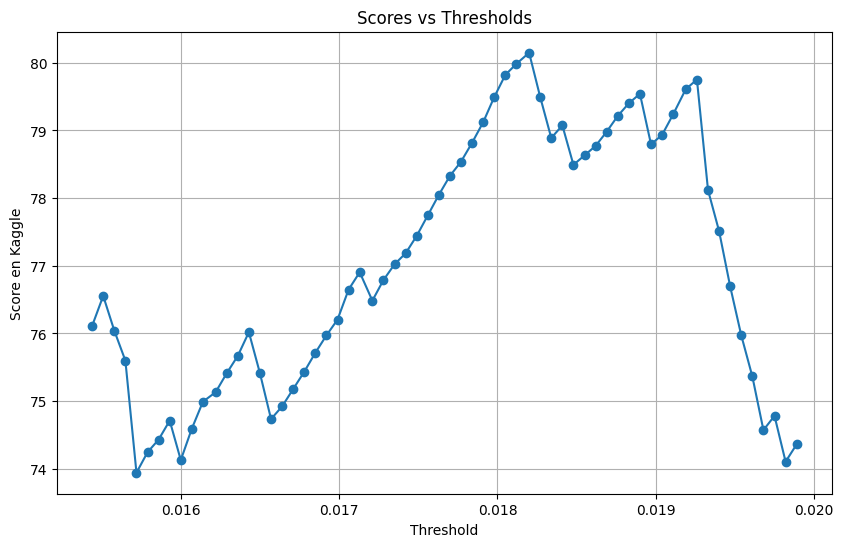


El mejor threshold es 0.0182 con un score de 80.148


In [24]:
# Crear un DataFrame con los thresholds y scores
df_scores_kaggle = pd.DataFrame({
    'threshold': thresholds_kaggle,
    'score_kaggle': scores_kaggle
})

# Graficar los scores
plt.figure(figsize=(10, 6))
plt.plot(df_scores_kaggle['threshold'], df_scores_kaggle['score_kaggle'], marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score en Kaggle')
plt.title('Scores vs Thresholds')
plt.grid(True)
plt.show()

# Encontrar el threshold con el máximo score
df_scores_kaggle = df_scores_kaggle.dropna()  # Eliminar posibles valores None
if not df_scores_kaggle.empty:
    max_score_index = df_scores_kaggle['score_kaggle'].idxmax()
    best_threshold = df_scores_kaggle.loc[max_score_index, 'threshold']
    best_score = df_scores_kaggle.loc[max_score_index, 'score_kaggle']

    print(f"\nEl mejor threshold es {best_threshold} con un score de {best_score}")
else:
    print("\nNo se obtuvieron scores válidos.")